In [3]:
import numpy as np
import pandas as pd
import material as ml
import thinfilm as tm
import matplotlib.pyplot as plt

air = ml.Non_Dispersion(1)
SiO2 = ml.open_material('SiO2_LENS', 'Sellmeier') 
SiN = ml.open_material('SiN_LENS', 'Sellmeier')
ITO = ml.open_material('ITO_LENS', 'Sellmeier')
OC = ml.open_material('OC_LENS', 'Material')
sodalime = ml.open_material('sodalime', 'Material')

wl = np.linspace(400,700,301)

hypo_bri = lambda th: tm.Design(
    [air, OC, SiN, SiO2, ITO, OC, ITO, SiO2, SiN, sodalime],
    [None, th[0], th[1], th[2], th[3], 1200, 55, th[4], th[5], None]
).reflectance(wl)

hypo_dia = lambda th: tm.Design(
    [air, OC, SiN, SiO2, ITO, SiO2, SiN, sodalime],
    [None, th[0], th[1], th[2], th[3], th[4], th[5], None]
).reflectance(wl)

hypo_tra = lambda th: tm.Design(
    [air, OC, SiN, SiO2, SiO2, SiN, sodalime],
    [None, th[0], th[1], th[2], th[4], th[5], None]
).reflectance(wl)



In [22]:
f1=[1828.89389151,10.70281618,42.65220525,22.05045053,53.14026566,12.04994776]
f2=[1709.13583932,12.45146288,34.2594313,20,33.38007035,14.28094988]

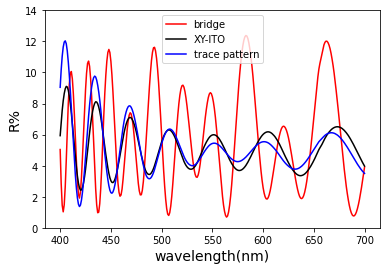

bridge: 5.7980190277056876
xy-ITO: 5.146444277511261
pattern: 5.230889016936854
delta_d_t: 0.5679665499218526
delta_d_b: 3.053459495485307


In [29]:
tk=f2
plt.plot(wl, 100*hypo_bri(tk), '-r', label = 'bridge')
plt.plot(wl, 100*hypo_dia(tk), '-k', label = 'XY-ITO')
plt.plot(wl, 100*hypo_tra(tk), '-b', label = 'trace pattern')
plt.xlabel('wavelength(nm)', fontsize = 14)
plt.ylabel('R%', fontsize = 14)
plt.legend(loc = 'best')
plt.ylim(0,14)
plt.savefig('LENS_polaris_simulation')
plt.show()

print('bridge:',100*np.mean(hypo_bri(tk)))
print('xy-ITO:',100*np.mean(hypo_dia(tk)))
print('pattern:',100*np.mean(hypo_tra(tk)))
print('delta_d_t:',np.mean(abs(100*hypo_tra(tk)-100*hypo_dia(tk))))
print('delta_d_b:',np.mean(abs(100*hypo_bri(tk)-100*hypo_dia(tk))))